In [3]:
import json
import os
from pathlib import Path

# Chemin relatif depuis le notebook
DATA_DIR = Path("../data")  # ../data depuis notebooks/

# Dictionnaire des fichiers disponibles
ARC_FILES = {
    "train_challenges": "arc-agi_training_challenges.json",
    "train_solutions": "arc-agi_training_solutions.json",
    "test_challenges": "arc-agi_test_challenges.json",
    "eval_challenges": "arc-agi_evaluation_challenges.json",
    "eval_solutions": "arc-agi_evaluation_solutions.json",
    "detected_transformations": "detected_transformations.json"
}

def load_arc_data(file_type: str, verbose: bool = True):
    """
    Charge les données ARC depuis les fichiers JSON
    
    Args:
        file_type: Type de données à charger (clé du dictionnaire ARC_FILES)
        verbose: Afficher les informations de chargement
        
    Returns:
        Données chargées (généralement un dictionnaire ou une liste)
        
    Raises:
        FileNotFoundError: Si le fichier spécifié n'existe pas
        ValueError: Si le type de fichier est invalide
    """
    if file_type not in ARC_FILES:
        raise ValueError(f"Type de fichier invalide. Options: {list(ARC_FILES.keys())}")
    
    file_name = ARC_FILES[file_type]
    file_path = DATA_DIR / file_name
    
    if not file_path.exists():
        # Essayer de trouver le fichier dans d'autres chemins possibles
        alt_path = Path(".").resolve() / "data" / file_name
        if alt_path.exists():
            file_path = alt_path
        else:
            raise FileNotFoundError(
                f"Fichier introuvable: {file_path}\n"
                f"Vérifiez que le fichier existe dans: {DATA_DIR.resolve()}"
            )
    
    if verbose:
        print(f"Chargement: {file_path} ...")
    
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    if verbose:
        if isinstance(data, dict):
            print(f"-> {len(data)} entrées chargées")
        elif isinstance(data, list):
            print(f"-> {len(data)} éléments chargés")
        else:
            print("-> Données chargées")
    
    return data

# Exemple d'utilisation dans un notebook
if __name__ == "__main__" or "__file__" not in globals():
    # Test simple de chargement
    try:
        train_data = load_arc_data("train_challenges")
        print("\nChargement réussi!")
        sample_key = next(iter(train_data))
        print(f"Clé d'exemple: {sample_key}")
        
    except Exception as e:
        print(f"\nErreur lors du chargement: {e}")
        print(f"Chemin data actuel: {DATA_DIR.resolve()}")
        print("Contenu du dossier data:")
        for f in DATA_DIR.glob("*"):
            print(f" - {f.name}")

Chargement: ..\data\arc-agi_training_challenges.json ...
-> 1000 entrées chargées

Chargement réussi!
Clé d'exemple: 00576224


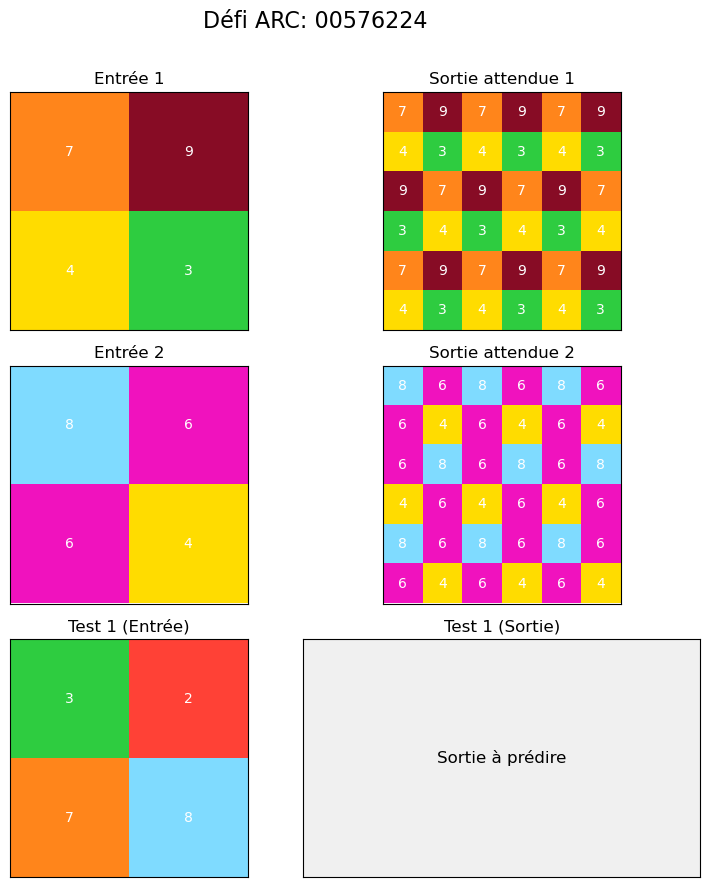


Détails du défi 00576224:
- 2 exemples d'entraînement
- 1 cas de test

Dimensions des grilles:
Entrées d'entraînement: (2, 2)
Sorties d'entraînement: (6, 6)
Entrées de test: (2, 2)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.gridspec import GridSpec

def display_arc_challenge(challenge_id, challenge_data):
    """
    Affiche un défi ARC complet avec ses exemples d'entraînement et cas de test.
    
    Args:
        challenge_id: ID du défi (ex: "00576224")
        challenge_data: Données du défi chargées depuis JSON
    """
    if challenge_id not in challenge_data:
        print(f"ERREUR: Le défi {challenge_id} n'a pas été trouvé dans les données.")
        return
    
    challenge = challenge_data[challenge_id]
    train_pairs = challenge.get("train", [])
    test_pairs = challenge.get("test", [])
    
    # Création d'une palette de couleurs ARC
    colors = [
        '#000000',  # 0: noir (fond)
        '#0074D9',  # 1: bleu
        '#FF4136',  # 2: rouge
        '#2ECC40',  # 3: vert
        '#FFDC00',  # 4: jaune
        '#AAAAAA',  # 5: gris
        '#F012BE',  # 6: rose
        '#FF851B',  # 7: orange
        '#7FDBFF',  # 8: cyan
        '#870C25'   # 9: marron
    ]
    cmap = mcolors.ListedColormap(colors)
    
    # Création de la figure
    n_train = len(train_pairs)
    n_test = len(test_pairs)
    total_pairs = n_train + n_test
    
    fig = plt.figure(figsize=(8, 3 * total_pairs))
    gs = GridSpec(total_pairs, 2, figure=fig)
    
    fig.suptitle(f'Défi ARC: {challenge_id}', fontsize=16, y=0.98)
    
    # Affichage des exemples d'entraînement
    for i, pair in enumerate(train_pairs):
        ax_input = fig.add_subplot(gs[i, 0])
        ax_output = fig.add_subplot(gs[i, 1])
        
        input_grid = np.array(pair["input"])
        output_grid = np.array(pair["output"])
        
        ax_input.imshow(input_grid, cmap=cmap, vmin=0, vmax=9)
        ax_input.set_title(f"Entrée {i+1}")
        ax_input.set_xticks([])
        ax_input.set_yticks([])
        
        ax_output.imshow(output_grid, cmap=cmap, vmin=0, vmax=9)
        ax_output.set_title(f"Sortie attendue {i+1}")
        ax_output.set_xticks([])
        ax_output.set_yticks([])
        
        # Ajouter les valeurs dans les cases
        for y in range(input_grid.shape[0]):
            for x in range(input_grid.shape[1]):
                ax_input.text(x, y, input_grid[y, x], 
                             ha='center', va='center', 
                             color='white' if input_grid[y, x] > 0 else 'gray')
                
        for y in range(output_grid.shape[0]):
            for x in range(output_grid.shape[1]):
                ax_output.text(x, y, output_grid[y, x], 
                              ha='center', va='center', 
                              color='white' if output_grid[y, x] > 0 else 'gray')
    
    # Affichage des cas de test (entrées seulement)
    for j, pair in enumerate(test_pairs):
        i = j + n_train  # Position dans la grille
        
        ax_input = fig.add_subplot(gs[i, 0])
        ax_output = fig.add_subplot(gs[i, 1])
        
        input_grid = np.array(pair["input"])
        
        ax_input.imshow(input_grid, cmap=cmap, vmin=0, vmax=9)
        ax_input.set_title(f"Test {j+1} (Entrée)")
        ax_input.set_xticks([])
        ax_input.set_yticks([])
        
        # Ajouter les valeurs dans les cases
        for y in range(input_grid.shape[0]):
            for x in range(input_grid.shape[1]):
                ax_input.text(x, y, input_grid[y, x], 
                             ha='center', va='center', 
                             color='white' if input_grid[y, x] > 0 else 'gray')
        
        # Zone vide pour la sortie (inconnue)
        ax_output.set_facecolor('#f0f0f0')
        ax_output.text(0.5, 0.5, "Sortie à prédire", 
                      ha='center', va='center', fontsize=12)
        ax_output.set_title(f"Test {j+1} (Sortie)")
        ax_output.set_xticks([])
        ax_output.set_yticks([])
    
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()
    
    # Affichage des informations textuelles
    print(f"\nDétails du défi {challenge_id}:")
    print(f"- {len(train_pairs)} exemples d'entraînement")
    print(f"- {len(test_pairs)} cas de test")
    
    # Analyse des tailles de grille
    train_input_sizes = set(str(np.array(pair["input"]).shape) for pair in train_pairs)
    train_output_sizes = set(str(np.array(pair["output"]).shape) for pair in train_pairs)
    
    print("\nDimensions des grilles:")
    print(f"Entrées d'entraînement: {', '.join(train_input_sizes)}")
    print(f"Sorties d'entraînement: {', '.join(train_output_sizes)}")
    
    test_sizes = set(str(np.array(pair["input"]).shape) for pair in test_pairs)
    print(f"Entrées de test: {', '.join(test_sizes)}")

# Charger les données si nécessaire
# train_data = load_arc_data("train_challenges")

# Utilisation avec le défi chargé précédemment
display_arc_challenge("00576224", train_data)

Précision globale: 0.83%
Tâches correctement prédites: 2 / 240

Exemples de prédictions:

Tâche 0b148d64: INCORRECT
Entrée (test):


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,1,1,1,0,1,0,0,3,0,3,3,3,3,3,3,0
1,1,0,1,0,1,1,0,0,0,3,0,3,3,3,0,0,0
2,1,1,0,1,1,0,0,0,0,0,0,3,3,3,3,0,0
3,0,0,0,1,1,1,0,0,3,3,0,3,3,0,3,0,0
4,1,1,1,1,1,1,0,0,0,3,0,3,3,3,0,3,3
5,1,1,1,1,1,1,0,0,3,3,0,0,0,3,0,0,3
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



Prédiction:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,7,7,7,7,7,7,7,7,7
2,0,0,0,0,0,7,0,0,0,7,0,7,0,7
3,0,0,0,0,0,7,0,7,0,7,0,0,0,7
4,0,0,0,0,0,7,7,7,7,7,7,7,7,7
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0



Solution réelle:


,0,1,2,3,4,5
0,1,1,1,1,0,1
1,1,0,1,0,1,1
2,1,1,0,1,1,0
3,0,0,0,1,1,1
4,1,1,1,1,1,1
5,1,1,1,1,1,1


--------------------------------------------------

Tâche 025d127b: INCORRECT
Entrée (test):


,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,0
1,0,4,4,4,4,4,4,0,0,0
2,0,4,0,0,0,0,0,4,0,0
3,0,0,4,0,0,0,0,0,4,0
4,0,0,0,4,0,0,0,0,0,4
5,0,0,0,0,4,4,4,4,4,4
6,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0



Prédiction:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,7,7,7,7,7,7,7,7,7
2,0,0,0,0,0,7,0,0,0,7,0,7,0,7
3,0,0,0,0,0,7,0,7,0,7,0,0,0,7
4,0,0,0,0,0,7,7,7,7,7,7,7,7,7
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0



Solution réelle:


,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,0
1,0,0,4,4,4,4,4,4,0,0
2,0,0,4,0,0,0,0,0,4,0
3,0,0,0,4,0,0,0,0,0,4
4,0,0,0,0,4,0,0,0,0,4
5,0,0,0,0,4,4,4,4,4,4
6,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0


--------------------------------------------------

Tâche 1e0a9b12: INCORRECT
Entrée (test):


,0,1,2,3,4
0,0,2,0,4,3
1,5,0,0,0,0
2,0,0,6,0,0
3,5,2,0,4,0
4,5,0,0,0,0



Prédiction:


,0,1,2,3,4,5,6,7,8
0,0,0,0,0,0,0,9,6,7
1,0,0,0,0,0,0,8,7,7
2,0,0,0,0,0,0,2,8,7
3,0,0,0,9,6,7,9,6,7
4,0,0,0,8,7,7,8,7,7
5,0,0,0,2,8,7,2,8,7
6,0,0,0,0,0,0,9,6,7
7,0,0,0,0,0,0,8,7,7
8,0,0,0,0,0,0,2,8,7



Solution réelle:


,0,1,2,3,4
0,0,0,0,0,0
1,0,0,0,0,0
2,5,0,0,0,0
3,5,2,0,4,0
4,5,2,6,4,3


--------------------------------------------------


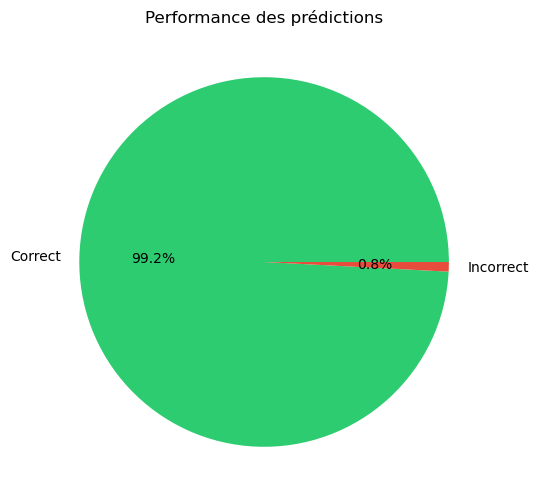

In [12]:
from IPython.display import display
import pandas as pd

# clé pour training solutions
with open("../data/arc-agi_training_solutions.json") as f:
    solutions = json.load(f)

# On charge les prédictions
with open("../data/predicted_solutions.json", "r") as f:
    predictions = json.load(f)

# Fonction pour comparer les deux grilles
def grids_equal(grid1, grid2):
    try:
        return np.array_equal(np.array(grid1), np.array(grid2))
    except:
        return False
    
# Calcul de la précision
results = []
for task_id, pred in predictions.items():
    if task_id in solutions:
        sol = solutions[task_id][0] # Première solution
        correct = grids_equal(pred, sol)
        results.append({
            "task_id": task_id,
            "correct": correct,
            "predicted": pred,
            "solution": sol
        })

# Création d'un DF
df = pd.DataFrame(results)
accuracy = df['correct'].mean() if not df.empty else 0

print(f"Précision globale: {accuracy:.2%}")

if not df.empty:
    print(f"Tâches correctement prédites: {df['correct'].sum()} / {len(df)}")

    # Affiche quelques exemples
    print("\nExemples de prédictions:")
    sample = df.sample(min(3, len(df)), random_state=42)
    for _, row in sample.iterrows():
        print(f"\nTâche {row['task_id']}: {'CORRECT' if row['correct'] else 'INCORRECT'}")
        print(f"Entrée (test):")
        # Charge l'entrée correspondante
        with open("../data/arc-agi_test_challenges.json") as f:
            test_data = json.load(f)
            test_input = test_data[row['task_id']]["test"][0]["input"]
            display(pd.DataFrame(test_input))

        print("\nPrédiction:")
        display(pd.DataFrame(row["predicted"]))

        print("\nSolution réelle:")
        display(pd.DataFrame(row["solution"]))

        print("-" * 50)

    # Visualisation des performances
    plt.figure(figsize=(10, 6))
    df["correct"].value_counts().plot.pie(
        autopct='%1.1f%%',
        labels=['Correct', 'Incorrect'],
        colors=['#2ecc71', "#e74c3c"]
    )
    plt.title("Performance des prédictions")
    plt.ylabel("")
    plt.show()
else:
    print("Aucune prédiction à évaluer")


In [ ]:
def visualize_solution(task_id, test_input, predicted, solution):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Input
    axes[0].imshow(np.array(test_input), cmap='tab20')
    axes[0].set_title("Input")
    
    # Prédiction
    axes[1].imshow(np.array(predicted), cmap='tab20')
    axes[1].set_title("Prediction")
    
    # Solution
    axes[2].imshow(np.array(solution), cmap='tab20')
    axes[2].set_title("Solution")
    
    plt.suptitle(f"Tâche {task_id}")
    plt.show()

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

class ARCTransformer(nn.Module):
    def __init__(self, max_size=30, num_colors=10):
        super().__init__()
        self.max_size = max_size
        self.num_colors = num_colors
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(num_colors, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            nn.AdaptiveAvgPool2d((8, 8))
        )
        
        # Transformation decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, num_colors, kernel_size=3, padding=1)
        )
        
        # Size predictor
        self.size_predictor = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512 * 8 * 8, 1024),
            nn.ReLU(),
            nn.Linear(1024, 256),
            nn.ReLU(),
            nn.Linear(256, 2)  # Prédit (height, width)
        )

    def forward(self, x):
        # Encoder
        features = self.encoder(x)
        
        # Decoder
        output = self.decoder(features)
        
        # Size prediction
        size = self.size_predictor(features)
        
        
        return output, size

    def predict(self, input_grid):
        """Prédiction pour une grille d'entrée"""
        # Préparation de l'entrée
        input_tensor = self.grid_to_tensor(input_grid)
        
        # Passage dans le réseau
        with torch.no_grad():
            output, size = self.forward(input_tensor.unsqueeze(0))
            
        # Conversion en grille
        output_grid = self.tensor_to_grid(output[0])
        
        # Taille prédite
        pred_h, pred_w = torch.round(size[0]).int().tolist()
        pred_h = max(1, min(self.max_size, pred_h))
        pred_w = max(1, min(self.max_size, pred_w))
        
        # Recadrage à la taille prédite
        return [row[:pred_w] for row in output_grid[:pred_h]]

    def grid_to_tensor(self, grid):
        """Convertit une grille en tenseur one-hot"""
        # Padder à la taille max
        padded = np.zeros((self.max_size, self.max_size), dtype=int)
        h, w = len(grid), len(grid[0])
        padded[:h, :w] = grid
        
        # Conversion one-hot
        one_hot = np.zeros((self.num_colors, self.max_size, self.max_size))
        for c in range(self.num_colors):
            one_hot[c] = (padded == c).astype(float)
            
        return torch.tensor(one_hot, dtype=torch.float32)

    def tensor_to_grid(self, tensor):
        """Convertit un tenseur en grille de couleurs"""
        # Prendre l'argmax sur les canaux de couleur
        grid = torch.argmax(tensor, dim=0).numpy()
        return grid.tolist()

In [20]:
# Pipeline complet
import torch.optim as optim

# Charger les données
def load_data(file_path):
    with open(file_path) as f:
        return json.load(f)

# Initialisation
train_challenges = load_data("../data/arc-agi_training_challenges.json")
test_challenges = load_data("../data/arc-agi_test_challenges.json")

# Créer le dataset et dataloader (corrigé)
class ARCDataset(torch.utils.data.Dataset):
    def __init__(self, data, max_size=64, num_colors=10):
        self.max_size = max_size
        self.num_colors = num_colors
        self.pairs = self._prepare_pairs(data)
        
    def _prepare_pairs(self, data):
        pairs = []
        for task_id, task_data in data.items():
            for example in task_data["train"]:
                pairs.append((example["input"], example["output"]))
        return pairs
    
    def __len__(self):
        return len(self.pairs)
    
    def __getitem__(self, idx):
        input_grid, output_grid = self.pairs[idx]
        
        # Convertir en tenseurs
        input_tensor = self.grid_to_tensor(input_grid)
        output_tensor = self.grid_to_tensor(output_grid)
        
        # Taille cible
        h, w = len(output_grid), len(output_grid[0])
        size = torch.tensor([h, w], dtype=torch.float32)
        
        return input_tensor, output_tensor, size
    
    def grid_to_tensor(self, grid):
        """Convertit une grille en tenseur one-hot"""
        padded = np.zeros((self.max_size, self.max_size), dtype=int)
        h, w = len(grid), len(grid[0])
        padded[:h, :w] = grid
        
        one_hot = np.zeros((self.max_size, self.max_size, self.num_colors))
        for i in range(self.max_size):
            for j in range(self.max_size):
                if padded[i, j] < self.num_colors:
                    one_hot[i, j, padded[i, j]] = 1
                    
        # Réorganiser les dimensions pour (channels, height, width)
        one_hot = np.moveaxis(one_hot, -1, 0)
        return torch.tensor(one_hot, dtype=torch.float32)

# Fonction d'entraînement corrigée
def train_model(model, dataloader, epochs=50, lr=0.001):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    
    # Utiliser BCELoss au lieu de CrossEntropyLoss
    criterion = nn.BCEWithLogitsLoss()
    size_criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    for epoch in range(epochs):
        model.train()
        total_loss = 0.0
        
        for inputs, targets, sizes in dataloader:
            inputs, targets, sizes = inputs.to(device), targets.to(device), sizes.to(device)
            
            optimizer.zero_grad()
            
            # Forward pass
            outputs, pred_sizes = model(inputs)
            
            # Calcul des pertes
            loss_color = criterion(outputs, targets)
            loss_size = size_criterion(pred_sizes, sizes)
            loss = loss_color + loss_size * 0.1  # Poids pour la taille
            
            # Backward pass
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
        
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(dataloader):.4f}")
    
    return model

# Créer le dataset
train_dataset = ARCDataset(train_challenges)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Initialiser et entraîner le modèle
model = ARCTransformer()
trained_model = train_model(model, train_loader, epochs=50)

# Sauvegarder le modèle
torch.save(trained_model.state_dict(), "../models/arc_transformer.pth")

# Prédire pour les tâches de test
predictions = {}
for task_id, task_data in test_challenges.items():
    test_input = task_data["test"][0]["input"]
    predicted_output = trained_model.predict(test_input)
    predictions[task_id] = predicted_output

# Sauvegarder les prédictions
with open("../data/deep_learning_predictions.json", "w") as f:
    json.dump(predictions, f, indent=2)

Epoch 1/50, Loss: 3.6142
Epoch 2/50, Loss: 2.5920
Epoch 3/50, Loss: 2.4232
Epoch 4/50, Loss: 2.1297
Epoch 5/50, Loss: 2.1459
Epoch 6/50, Loss: 2.1308


: 

In [ ]:
# Visualisation
def display_prediction(task_id, test_input, prediction, solution=None):
    fig, axes = plt.subplots(1, 2 + int(solution is not None), figsize=(15, 5))
    
    # Input
    axes[0].imshow(np.array(test_input), cmap='tab10', vmin=0, vmax=9)
    axes[0].set_title(f"Input (Task {task_id})")
    
    # Prediction
    axes[1].imshow(np.array(prediction), cmap='tab10', vmin=0, vmax=9)
    axes[1].set_title("Prediction")
    
    # Solution (si disponible)
    if solution:
        axes[2].imshow(np.array(solution), cmap='tab10', vmin=0, vmax=9)
        axes[2].set_title("Solution")
    
    plt.tight_layout()
    plt.show()

# Charger les prédictions
with open("data/deep_learning_predictions.json") as f:
    predictions = json.load(f)

# Charger les solutions (si disponibles)
try:
    with open("data/arc-agi_training_solutions.json") as f:
        solutions = json.load(f)
except:
    solutions = None

# Afficher quelques prédictions
for task_id, prediction in list(predictions.items())[:5]:
    test_input = test_challenges[task_id]["test"][0]["input"]
    solution = solutions.get(task_id, [None])[0] if solutions else None
    display_prediction(task_id, test_input, prediction, solution)